In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pathlib
import os
import PIL
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix, classification_report

-------------------------------------------------------------------------------------------------------------

In [2]:
data_dir = (r'D:\Rostock-Masters\Thesis\Data\full_images')
data_dir

'D:\\Rostock-Masters\\Thesis\\Data\\full_images'

In [3]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('D:/Rostock-Masters/Thesis/Data/full_images')

In [10]:
devices_label_dict = {
    'Device_1' : 0,
    'Device_2' : 1,
    'Device_3' : 2,
    'Device_4' : 3,
    'Device_5' : 4,
    'Device_6' : 5,
}

### Classification

In [17]:
lst= []
for device_name, images in device_image_dict.items():
    print (device_name, ':',end = ' ')
    print(len(images))
    lst.append(len(images))
print(f'Total numbers of images are: {sum(lst)}')

Device_1 : 100
Device_2 : 100
Device_3 : 100
Device_4 : 100
Device_5 : 100
Device_6 : 100
Total numbers of images are: 600


# Image shape

In [19]:
#Saving image data to a dataframe
device_list, label_list = [],[]

for device_name, folder in device_image_dict.items():
    for image in folder:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(35,35))
        flattened = resized_img.reshape(-1)
        df_flat= pd.DataFrame(flattened.reshape(1,-1))
        device_list.append(df_flat)
        label_list.append(devices_label_dict[device_name])

In [20]:
device_list[300]

,0,1,2,3,4,5,6,7,8,9,...,3665,3666,3667,3668,3669,3670,3671,3672,3673,3674
0,248,251,254,238,245,254,251,252,248,255,...,244,252,249,243,254,254,251,251,252,252


In [21]:
df_merged= pd.concat(device_list)
df_merged= df_merged.reset_index(drop=True)
df_merged

,0,1,2,3,4,5,6,7,8,9,...,3665,3666,3667,3668,3669,3670,3671,3672,3673,3674
0,241,254,255,231,246,254,249,253,248,255,...,231,254,251,236,255,252,245,247,246,244
1,250,249,254,243,248,255,252,254,241,255,...,250,255,254,250,254,253,250,255,254,252
2,241,255,254,250,255,251,255,252,234,255,...,239,253,247,234,253,253,246,251,251,249
3,245,253,251,243,255,254,250,253,241,250,...,232,255,252,239,247,246,238,250,252,251
4,243,248,255,250,246,250,255,254,236,255,...,247,250,250,237,253,253,241,248,249,239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,243,249,253,252,253,255,255,251,236,255,...,246,251,251,249,246,249,249,247,252,253
596,238,254,254,254,245,243,255,252,223,255,...,253,252,248,253,254,251,255,250,252,254
597,254,254,245,255,253,252,255,243,217,251,...,237,255,252,247,255,252,250,255,252,254
598,244,255,246,251,253,252,255,253,248,255,...,246,251,249,244,255,254,252,253,253,254


In [22]:
#Merging, Adding label, shuffling
df_with_label= df_merged
df_with_label['label'] = label_list
# df_with_label.to_csv('device_with_label.csv', index=False)
df_1 = df_with_label.sample(frac = 1).reset_index(drop=True)
df_1

,0,1,2,3,4,5,6,7,8,9,...,3666,3667,3668,3669,3670,3671,3672,3673,3674,label
0,241,255,245,251,254,254,255,252,249,255,...,255,255,247,255,252,248,255,255,254,4
1,235,248,249,250,251,254,255,251,246,255,...,252,249,231,255,255,244,248,246,239,2
2,255,251,251,254,252,254,252,252,245,254,...,255,255,242,255,255,249,253,255,253,2
3,233,254,245,242,254,253,255,253,249,255,...,254,253,248,252,251,250,251,252,254,5
4,248,255,245,240,253,250,250,253,250,255,...,252,246,250,254,251,255,245,248,255,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,253,251,253,242,247,249,252,255,241,255,...,255,255,242,254,254,247,250,253,251,1
596,244,252,252,253,252,240,255,255,235,255,...,253,253,253,255,255,255,255,255,255,4
597,250,252,252,239,247,254,249,250,239,255,...,255,254,240,247,245,238,254,254,252,2
598,255,255,247,255,251,251,251,239,214,253,...,255,254,241,255,255,236,255,255,239,2


In [24]:
y= np.array(df_1.label)

In [25]:
df_1.drop('label', axis=1,inplace= True)

In [26]:
df_1.shape

(600, 3675)

In [27]:
resized_img.shape

(35, 35, 3)

In [28]:
X = np.array(df_1).reshape(df_1.shape[0],resized_img.shape[0],resized_img.shape[1],resized_img.shape[2])
X.shape

(600, 35, 35, 3)

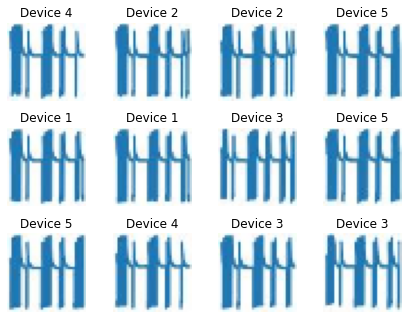

In [30]:
plt.figure(figsize = (6, 6))

for i in range(12):
    plt.subplot(4, 4, i+1).set_title(f'Device {y[i]}')
    RGB_img = cv2.cvtColor(np.squeeze(X[i]), cv2.COLOR_BGR2RGB)
    plt.imshow (RGB_img)
    plt.axis('off')

plt.tight_layout()
# plt.savefig('full_img_random_subplot.png', dpi=100)

In [32]:
X.shape

(600, 35, 35, 3)

In [33]:
len(X), len(y)

(600, 600)

In [34]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30,random_state=42, stratify= y)

In [38]:
#Print shapes
print('Train tensor shape: ',X_train.shape)
print('Test tensor shape: ',X_test.shape)
print('Single image shape:', X_train[0].shape)
print('Train_labels shape:', y_train.shape)
print('Test_labels shape:', y_test.shape)

Train tensor shape:  (420, 35, 35, 3)
Test tensor shape:  (180, 35, 35, 3)
Single image shape: (35, 35, 3)
Train_labels shape: (420,)
Test_labels shape: (180,)


In [39]:
#scaling data from 0 to 1
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [40]:
X_train_scaled[101].shape

(35, 35, 3)

In [41]:
y_test[10:20]

array([1, 1, 1, 5, 0, 5, 4, 0, 0, 2], dtype=int64)

In [42]:
#Building a model
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([

    tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=1, padding="same", activation='relu',kernel_initializer='he_normal',
                           input_shape=(X_train_scaled[0].shape)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    
    tf.keras.layers.Conv2D(16,3, padding="same", activation='relu',kernel_initializer='he_normal',),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(32,3, padding="same",activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64,3, padding="same",activation='relu',kernel_initializer='he_normal', ),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,kernel_initializer='normal',activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(256,kernel_initializer='normal',activation='relu'),#kernel_initializer='normal'
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(6, activation= 'softmax') #Output layer
])
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 35, 35, 8)         224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 17, 17, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 8, 8, 16)          0         
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 32)          4

In [43]:
model_2.compile(loss="sparse_categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

history= model_2.fit(X_train_scaled, y_train, epochs=200, batch_size=64, validation_split=0.20, shuffle = True) #validation_split=0.33
history

Epoch 1/200
6/6 [==============================] - 10s 85ms/step - loss: 1.9216 - accuracy: 0.1488 - val_loss: 1.8110 - val_accuracy: 0.1905
Epoch 2/200
6/6 [==============================] - 0s 13ms/step - loss: 1.8440 - accuracy: 0.1548 - val_loss: 1.7955 - val_accuracy: 0.1905
Epoch 3/200
6/6 [==============================] - 0s 14ms/step - loss: 1.8057 - accuracy: 0.1994 - val_loss: 1.7978 - val_accuracy: 0.1667
Epoch 4/200
6/6 [==============================] - 0s 13ms/step - loss: 1.7881 - accuracy: 0.1994 - val_loss: 1.8045 - val_accuracy: 0.1667
Epoch 5/200
6/6 [==============================] - 0s 12ms/step - loss: 1.8029 - accuracy: 0.1696 - val_loss: 1.8064 - val_accuracy: 0.1071
Epoch 6/200
6/6 [==============================] - 0s 9ms/step - loss: 1.7877 - accuracy: 0.1845 - val_loss: 1.8014 - val_accuracy: 0.1786
Epoch 7/200
6/6 [==============================] - 0s 10ms/step - loss: 1.7903 - accuracy: 0.1667 - val_loss: 1.7989 - val_accuracy: 0.1071
Epoch 8/200
6/6 [===

6/6 [==============================] - 0s 11ms/step - loss: 0.0211 - accuracy: 0.9970 - val_loss: 0.0732 - val_accuracy: 0.9881
Epoch 118/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0297 - accuracy: 0.9911 - val_loss: 0.0733 - val_accuracy: 0.9881
Epoch 119/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0233 - accuracy: 0.9940 - val_loss: 0.0804 - val_accuracy: 0.9881
Epoch 120/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0169 - accuracy: 0.9911 - val_loss: 0.0611 - val_accuracy: 0.9881
Epoch 121/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0121 - accuracy: 0.9970 - val_loss: 0.0569 - val_accuracy: 0.9881
Epoch 122/200
6/6 [==============================] - 0s 12ms/step - loss: 0.0257 - accuracy: 0.9940 - val_loss: 0.0667 - val_accuracy: 0.9881
Epoch 123/200
6/6 [==============================] - 0s 13ms/step - loss: 0.0488 - accuracy: 0.9821 - val_loss: 0.1390 - val_accuracy: 0.9762
Epoch 124/200
6/6 [=

Epoch 175/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0137 - accuracy: 0.9970 - val_loss: 0.1069 - val_accuracy: 0.9881
Epoch 176/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0240 - accuracy: 0.9940 - val_loss: 0.1096 - val_accuracy: 0.9881
Epoch 177/200
6/6 [==============================] - 0s 14ms/step - loss: 0.0074 - accuracy: 0.9940 - val_loss: 0.1105 - val_accuracy: 0.9762
Epoch 178/200
6/6 [==============================] - 0s 12ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.1107 - val_accuracy: 0.9762
Epoch 179/200
6/6 [==============================] - 0s 11ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.1033 - val_accuracy: 0.9881
Epoch 180/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0062 - accuracy: 0.9970 - val_loss: 0.1009 - val_accuracy: 0.9881
Epoch 181/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0034 - accuracy: 0.9970 - val_loss: 0.0970 - val_accuracy: 0.9881
Epoch 1

In [44]:
print('Validation accuracy : ', (np.mean(history.history['val_accuracy'][-50:]))*100, '%') # Mean of last 50 values

Validation accuracy :  98.54761731624603 %


In [45]:
# model_2.save('150x75_saved_model.h5')

In [46]:
loss, accuracy= model_2.evaluate(X_test_scaled, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')
print('Test accuracy : ',accuracy*100,'%')

6/6 [==============================] - 0s 3ms/step - loss: 0.1096 - accuracy: 0.9722
Loss: 0.10956501215696335, Accuracy: 0.9722222089767456
Test accuracy :  97.22222089767456 %


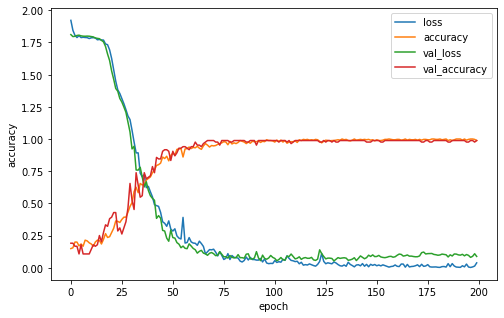

In [47]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.xlabel('epoch')
plt.ylabel('accuracy')
# plt.savefig('full_img_acc_loss.pdf', bbox_inches = 'tight', pad_inches = 0, dpi= 100)
plt.show()

In [48]:
y_pred = model_2.predict(X_test_scaled)
# y_pred[:10]

6/6 [==============================] - 0s 2ms/step


In [49]:
import sys
# np.set_printoptions(threshold=sys.maxsize, suppress=True)
y_pred

array([[4.15840619e-15, 8.90834823e-13, 4.96604741e-07, 4.61608096e-07,
        9.99999046e-01, 2.42402381e-14],
       [9.94027332e-08, 1.23825723e-08, 9.99998212e-01, 1.00446591e-07,
        1.59323997e-06, 2.32618820e-11],
       [6.02766806e-14, 3.55268611e-07, 1.24200390e-11, 9.99999642e-01,
        1.48353205e-08, 1.67239840e-08],
       ...,
       [6.76080936e-18, 4.96668484e-15, 5.45901884e-08, 1.32908937e-08,
        9.99999881e-01, 3.82064302e-17],
       [7.02239191e-08, 3.74395226e-09, 9.99999762e-01, 1.47660177e-08,
        1.03961739e-07, 2.79580309e-12],
       [4.91767682e-10, 9.99991655e-01, 5.04342679e-10, 1.92545500e-07,
        2.65804631e-12, 8.08002278e-06]], dtype=float32)

In [50]:
y_pred[1]

array([9.9402733e-08, 1.2382572e-08, 9.9999821e-01, 1.0044659e-07,
       1.5932400e-06, 2.3261882e-11], dtype=float32)

In [52]:
y_pred_class = [np.argmax(i) for i in y_pred]
y_pred_class[:10]

[4, 2, 3, 5, 1, 0, 3, 2, 3, 2]

In [53]:
y_test[:10]

array([4, 2, 3, 5, 1, 0, 3, 2, 3, 2], dtype=int64)

In [54]:
loss, accuracy= model_2.evaluate(X_test_scaled, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')
print('Test accuracy : ',accuracy*100,'%')

6/6 [==============================] - 0s 4ms/step - loss: 0.1096 - accuracy: 0.9722
Loss: 0.10956501215696335, Accuracy: 0.9722222089767456
Test accuracy :  97.22222089767456 %


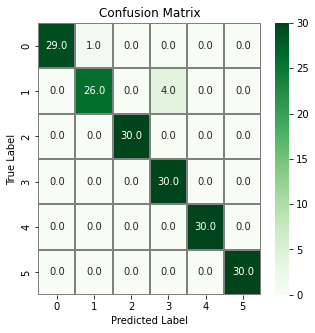

In [55]:
#Confusion matrix
import seaborn as sns
cm=confusion_matrix(y_test,y_pred_class)
#Plot
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=devices_label_dict)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
# disp.plot(ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
# plt.savefig('conf_m_full_img.pdf',bbox_inches = 'tight', pad_inches = 0, dpi= 100)
plt.show()

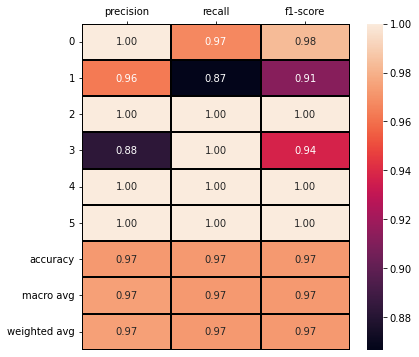

In [56]:
clf_report= classification_report(y_test, y_pred_class,output_dict=True)

 #.iloc[:-1, :] to exclude support
fig, ax = plt.subplots(figsize=(6,6))

# sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, cmap="Blues",linecolor="black", fmt= '.2f')
ax = sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True,linewidths=0.01,linecolor="black", fmt= '.2f')# cmap="Blues",
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
# plt.savefig('clf_full_img.pdf',bbox_inches = 'tight', pad_inches = 0, dpi= 100)
